# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
from pprint import pprint

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
firstCity = cities[1]
firstCity
        

'popondetta'

In [5]:
# Build query URL
units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?q={firstCity}&appid={weather_api_key}&units={units}"

url

'http://api.openweathermap.org/data/2.5/weather?q=popondetta&appid=b9243e2d7b71044b8840d4590278accb&units=imperial'

In [6]:
response = requests.get(url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -8.75, 'lon': 148.25},
 'dt': 1588658646,
 'id': 2088163,
 'main': {'feels_like': 85.19,
          'grnd_level': 1000,
          'humidity': 95,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 75.63,
          'temp_max': 75.63,
          'temp_min': 75.63},
 'name': 'Popondetta',
 'rain': {'1h': 1.31},
 'sys': {'country': 'PG', 'sunrise': 1588623027, 'sunset': 1588665412},
 'timezone': 36000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 320, 'speed': 0.49}}


In [7]:
response["clouds"]["all"]

100

In [8]:
lats = []
longs = []
temps = []
humids = []
pressures = []
winds = []
clouds = []

citiesFound = []
counter = 0

In [9]:
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    
    try:
        response = requests.get(url).json()
    
        code = response["cod"]

        if code == 200:  
            citiesFound.append(city)
            lats.append(response["coord"]["lat"])
            longs.append(response["coord"]["lon"])
            temps.append(response["main"]["temp"])
            humids.append(response["main"]["humidity"])
            pressures.append(response["main"]["pressure"])

            winds.append(response["wind"]["speed"])
            clouds.append(response["clouds"]["all"])

        if counter % 50 == 0:
            print(counter)
    
    except Exception as e:
        print(e)
    
    counter += 1
    time.sleep(1)

0
50
100
150
HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?q=jamestown&appid=b9243e2d7b71044b8840d4590278accb&units=imperial (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a23767850>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?q=springbok&appid=b9243e2d7b71044b8840d4590278accb&units=imperial (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a23767850>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?q=beloha&appid=b9243e2d7b71044b8840d4590278accb&units=imperial (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a23767a90>: 

In [ ]:
counter

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
len(df)

551

In [33]:
df = pd.DataFrame()
df["Cities"] = citiesFound
df["Latitude"] = lats
df["Longitude"] = longs
df["Temperature"] = temps
df["Humidity"] = humids
df["Pressure"] = pressures
df["Wind_speed"] = winds
df["Cloudiness"] = clouds

df.head()

,Cities,Latitude,Longitude,Temperature,Humidity,Pressure,Wind_speed,Cloudiness
0,almaguer,1.92,-76.85,53.85,50,1014,4.32,61
1,popondetta,-8.75,148.25,75.63,95,1009,0.49,100
2,albany,42.60,-73.97,43.50,76,1011,8.84,0
3,mvuma,-19.28,30.53,60.08,44,1024,11.70,1
4,santa cruz del norte,23.15,-81.92,70.66,83,1016,4.70,5


In [ ]:
weather_dataframe.head()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
df.describe()

,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,18.958058,16.576534,62.675535,68.827586,1013.586207,8.170127,49.021779
std,33.252386,90.935476,19.711972,22.702928,6.632380,5.687380,39.198417
min,-54.800000,-179.170000,-3.870000,7.000000,984.000000,0.220000,0.000000
25%,-7.625000,-64.540000,50.000000,58.000000,1009.000000,3.970000,3.000000
50%,20.960000,20.520000,64.990000,74.000000,1013.000000,6.930000,46.000000
75%,46.460000,100.345000,78.150000,87.000000,1018.000000,11.410000,90.000000
max,78.220000,179.320000,109.400000,100.000000,1035.000000,34.450000,100.000000


In [23]:
#  Get the indices of cities that have humidity over 100%.
mask = df.humidity <= 100
df_sub = df.loc[mask].reset_index(drop=True)

df_sub.head()  

,cities,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
0,almaguer,1.92,-76.85,53.85,50,1014,4.32,61
1,popondetta,-8.75,148.25,75.63,95,1009,0.49,100
2,albany,42.60,-73.97,43.50,76,1011,8.84,0
3,mvuma,-19.28,30.53,60.08,44,1024,11.70,1
4,santa cruz del norte,23.15,-81.92,70.66,83,1016,4.70,5


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

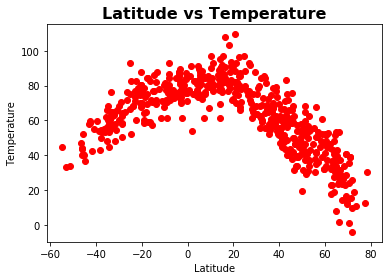

In [24]:
plt.scatter(df.latitude, df.temperature, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Humidity Plot

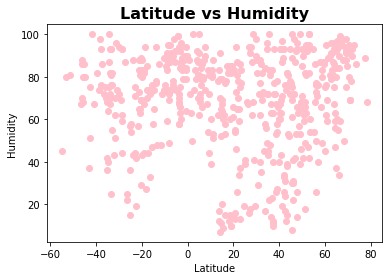

In [25]:
plt.scatter(df.latitude, df.humidity, color="pink")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Cloudiness Plot

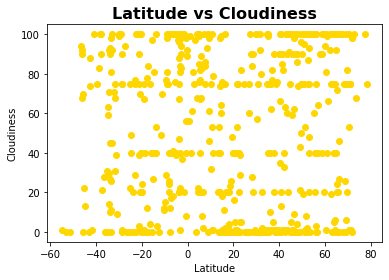

In [29]:
plt.scatter(df.latitude, df.cloudiness, color="gold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Wind Speed Plot

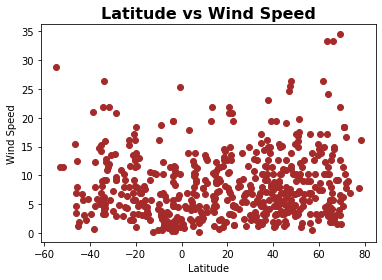

In [30]:
plt.scatter(df.latitude, df.wind_speed, color="brown")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed", fontsize=16, fontweight="bold")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression